<a href="https://colab.research.google.com/github/sevvaluluss/yt-machine-learning-exercise/blob/main/THYAO_SVR_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sklearn.metrics as mt

In [3]:
data=yf.download("THYAO.IS", start="2022-08-01",end="2022-09-01")
veri=data.copy()
veri.columns

[*********************100%%**********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
veri

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,50.750000,51.599998,50.650002,51.500000,51.500000,71659508
2022-08-02,51.799999,53.200001,51.650002,52.349998,52.349998,137217705
2022-08-03,52.950001,55.000000,52.799999,55.000000,55.000000,133031485
2022-08-04,55.700001,56.349998,55.099998,55.299999,55.299999,108646850
2022-08-05,55.650002,58.400002,55.200001,58.200001,58.200001,99647394
2022-08-08,58.400002,59.000000,57.599998,58.750000,58.750000,87925247
2022-08-09,58.750000,59.650002,57.900002,58.599998,58.599998,102076610
2022-08-10,58.799999,60.349998,58.599998,60.150002,60.150002,92599249
2022-08-11,61.900002,62.450001,60.099998,61.400002,61.400002,136866004


In [6]:
veri=veri.reset_index() #date sütunun diğer sütunlarla aynı seviyeye getirmek için kullandım
veri

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-01,50.750000,51.599998,50.650002,51.500000,51.500000,71659508
1,2022-08-02,51.799999,53.200001,51.650002,52.349998,52.349998,137217705
2,2022-08-03,52.950001,55.000000,52.799999,55.000000,55.000000,133031485
3,2022-08-04,55.700001,56.349998,55.099998,55.299999,55.299999,108646850
4,2022-08-05,55.650002,58.400002,55.200001,58.200001,58.200001,99647394
5,2022-08-08,58.400002,59.000000,57.599998,58.750000,58.750000,87925247
6,2022-08-09,58.750000,59.650002,57.900002,58.599998,58.599998,102076610
7,2022-08-10,58.799999,60.349998,58.599998,60.150002,60.150002,92599249
8,2022-08-11,61.900002,62.450001,60.099998,61.400002,61.400002,136866004
9,2022-08-12,61.849998,63.349998,61.250000,62.400002,62.400002,101328664


In [13]:
veri["Date"].astype(str) #date in tipini str olarak değiştirdim.
veri["Date"].astype(str).str.split("-") # date i yıl,ay,gün şeklinde ayırdım.

0     [2022, 08, 01]
1     [2022, 08, 02]
2     [2022, 08, 03]
3     [2022, 08, 04]
4     [2022, 08, 05]
5     [2022, 08, 08]
6     [2022, 08, 09]
7     [2022, 08, 10]
8     [2022, 08, 11]
9     [2022, 08, 12]
10    [2022, 08, 15]
11    [2022, 08, 16]
12    [2022, 08, 17]
13    [2022, 08, 18]
14    [2022, 08, 19]
15    [2022, 08, 22]
16    [2022, 08, 23]
17    [2022, 08, 24]
18    [2022, 08, 25]
19    [2022, 08, 26]
20    [2022, 08, 29]
21    [2022, 08, 31]
Name: Date, dtype: object

In [16]:
veri["Day"]=veri["Date"].astype(str).str.split("-").str[2] #sadece gün değerlerini getirdim
veri

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2022-08-01,50.750000,51.599998,50.650002,51.500000,51.500000,71659508,01
1,2022-08-02,51.799999,53.200001,51.650002,52.349998,52.349998,137217705,02
2,2022-08-03,52.950001,55.000000,52.799999,55.000000,55.000000,133031485,03
3,2022-08-04,55.700001,56.349998,55.099998,55.299999,55.299999,108646850,04
4,2022-08-05,55.650002,58.400002,55.200001,58.200001,58.200001,99647394,05
5,2022-08-08,58.400002,59.000000,57.599998,58.750000,58.750000,87925247,08
6,2022-08-09,58.750000,59.650002,57.900002,58.599998,58.599998,102076610,09
7,2022-08-10,58.799999,60.349998,58.599998,60.150002,60.150002,92599249,10
8,2022-08-11,61.900002,62.450001,60.099998,61.400002,61.400002,136866004,11
9,2022-08-12,61.849998,63.349998,61.250000,62.400002,62.400002,101328664,12


In [17]:
y=veri["Adj Close"] #bagımlı degısken
X=veri["Day"] #bagımsız degısken

In [23]:
y=np.array(y).reshape(-1,1) #array haline getiriyorum
X=np.array(X).reshape(-1,1)
X
y

array([[51.5       ],
       [52.34999847],
       [55.        ],
       [55.29999924],
       [58.20000076],
       [58.75      ],
       [58.59999847],
       [60.15000153],
       [61.40000153],
       [62.40000153],
       [63.59999847],
       [67.84999847],
       [68.69999695],
       [69.65000153],
       [68.5       ],
       [67.75      ],
       [67.80000305],
       [68.65000153],
       [70.30000305],
       [69.69999695],
       [70.44999695],
       [73.09999847]])

In [27]:
#veri ölçeklendirme/veriyi standartlaştırıyoruz
scy=StandardScaler()
scx=StandardScaler()

X=scx.fit_transform(X)
y=scy.fit_transform(y)

In [54]:
svrmodel=SVR(kernel="rbf",C=10000) #svr model kuruyoruz
svrmodel.fit(X,y)
tahminrbf=svrmodel.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


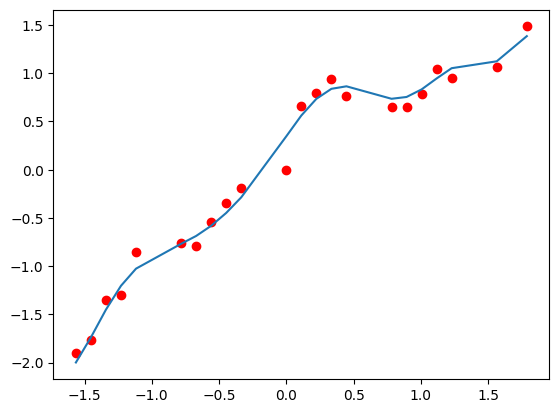

In [55]:
plt.scatter(X,y,color="red")
plt.plot(X,tahminrbf)
plt.show()

In [38]:
svrmodellin=SVR(kernel="linear") #linear model kuruyoruz
svrmodellin.fit(X,y)
tahminlin=svrmodellin.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


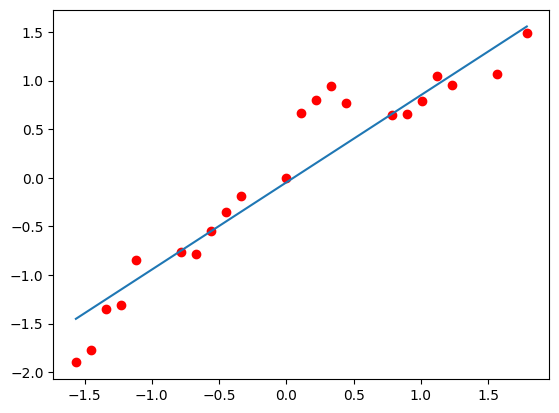

In [39]:
plt.scatter(X,y,color="red")
plt.plot(X,tahminlin)
plt.show()

In [49]:
svrmodelpoly=SVR(kernel="poly") #model kuruyoruz
svrmodelpoly.fit(X,y)
tahminpoly=svrmodelpoly.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


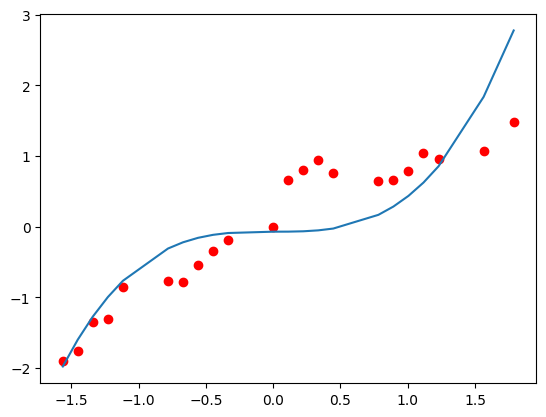

In [50]:
plt.scatter(X,y,color="red")
plt.plot(X,tahminpoly)
plt.show()

ÜÇ MODEL AYNI GRAFİKTE

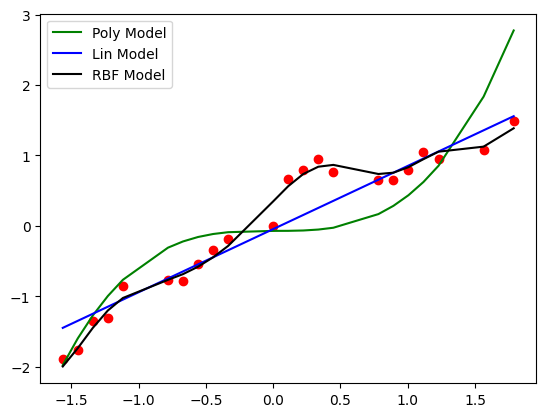

In [56]:
plt.scatter(X,y,color="red")
plt.plot(X,tahminpoly,color="green",label="Poly Model")
plt.plot(X,tahminlin,color="blue",label="Lin Model")
plt.plot(X,tahminrbf,color="black",label="RBF Model")
plt.legend()
plt.show()

In [57]:
r2=mt.r2_score(y,tahminrbf)
rmse=mt.mean_squared_error(y,tahminrbf,squared=False)
print("R2 : {} RMSE:{}".format(r2,rmse))

R2 : 0.986238949192245 RMSE:0.11730750533429249
